In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-sales-dataset/customer_details.csv
/kaggle/input/ecommerce-sales-dataset/basket_details.csv


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

basket = pd.read_csv('/kaggle/input/ecommerce-sales-dataset/basket_details.csv')
customer = pd.read_csv('/kaggle/input/ecommerce-sales-dataset/customer_details.csv')

In [3]:
#based on the info given, we can see there is no null entries so proceed
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
##grouping basket date so we can count number of sales according to date 
sales = basket.groupby('basket_date').count()
sales

,customer_id,product_id,basket_count
basket_date,,,
2019-05-20,518,518,518
2019-05-21,457,457,457
2019-05-22,276,276,276
2019-05-23,275,275,275
2019-05-24,611,611,611
2019-05-25,1162,1162,1162
2019-05-26,1578,1578,1578
2019-05-27,1617,1617,1617
2019-05-28,1213,1213,1213


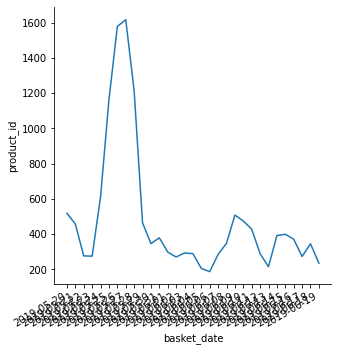

In [5]:
##visualize the sales data so we can see the trend 
g= sns.relplot(x="basket_date", y="product_id", kind='line', data=sales)
g.fig.autofmt_xdate()

Base on the line graph, we can see a large increment in sales during end of may from 24 of may to 28 of may 

In [6]:
##Here the data is grouped by their product id so we can see which product is in demand 
df = basket.groupby('product_id').count()
df1 = df.sort_values(["customer_id"], ascending=False)
df2=df1.head(10)
df2

,customer_id,basket_date,basket_count
product_id,,,
43524799,32,32,32
31516269,25,25,25
39833031,24,24,24
46130148,17,17,17
40276011,12,12,12
3735903,12,12,12
42033035,11,11,11
39050110,11,11,11
6411072,10,10,10


In [7]:
##We can also see the product_id which did not sell well 
df1.tail(10)

,customer_id,basket_date,basket_count
product_id,,,
33306037,1,1,1
33306574,1,1,1
33306687,1,1,1
33312723,1,1,1
33314086,1,1,1
33321392,1,1,1
33324373,1,1,1
33325533,1,1,1
33333841,1,1,1


Based on data analysis using basket file, we can see that sales are increasing in the end of may, so owner can actually increase the stock of 
their most demanded products during the period to gain more sales.However, there is no enough data that can interpret why the other product is not in demand. 
But now the owner can do a better marketing campaign as the most and least demanded products are known.

In [8]:
##read customer csv file and looked if there is null entries,there is no missing value, so proceed

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


In [9]:
customer.head()

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [10]:
##As sex is an object datatype, so we check into their categories
customer.sex.unique()

array(['Male', 'Female', 'kvkktalepsilindi', 'UNKNOWN'], dtype=object)

In [11]:
customer.index[customer['sex']=='UNKNOWN'].tolist()

[3597]

In [12]:
customer.index[customer['sex']=='kvkktalepsilindi'].tolist()

[1201, 6133, 6443, 8481, 9283, 10035, 11102, 19785]

In [13]:
customer1= customer.drop([customer.index[1201], customer.index[6133],customer.index[6443], customer.index[8481],customer.index[9283], customer.index[10035],customer.index[11102], customer.index[19785],customer.index[3597]])
customer1


,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [14]:
##Here sex category is checked and it is confirmed that the unknown and kvkktalepsilindi category are dropped
customer1.sex.unique()

array(['Male', 'Female'], dtype=object)

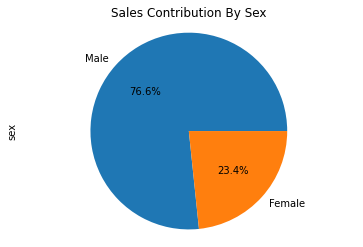

In [15]:
##Here the sales contribution is visualised 
customer1.sex.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Sales Contribution By Sex")
plt.axis('equal')
plt.show()  

According to pie chart, we can see males contribute the biggest portion of sales by 76.6%.

In [16]:
#Here the data is grouped by customer age to see the distribution of sales according to thei ages 
output = pd.pivot_table(data=customer, index=['customer_age'],
                        values='customer_id',
                        aggfunc=['count'])
output

,count
,customer_id
customer_age,
-34.0,1
3.0,2
4.0,1
5.0,710
6.0,1
...,...
127.0,1
130.0,1


There are outliers in customer ages, the outliers are dropped using z_scores

In [17]:
##Removing outliers
from scipy import stats
import numpy as np
z_scores = stats.zscore(output)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = output[filtered_entries]

print(new_df)

                   count
             customer_id
customer_age            
-34.0                  1
 3.0                   2
 4.0                   1
 5.0                 710
 6.0                   1
...                  ...
 124.0                 5
 127.0                 1
 130.0                 1
 139.0                 1
 149.0                 1

[91 rows x 1 columns]


<AxesSubplot:xlabel='customer_age'>

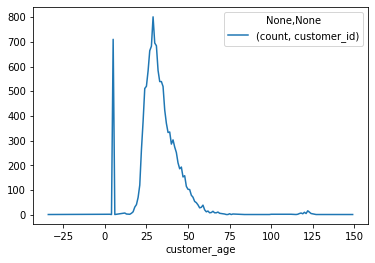

In [18]:
##Here I plot the customer age without outlier to see their contribution
new_df.plot()

We can see the biggest contribution is coming from customer with the age of 5 and customer in the group of 25 to 50.
Now the owner know their market target which is male and customer in the age of 5 and 25 to 50 years old. 